#  Real-Time TDDFT Combined with Molecular Dynamics   
**by <span style="color:darkgreen">Ronaldo Rodrigues Pela</span> for [<span style="color:darkgoldenrod">exciting *neon*</span>](https://www.exciting-code.org/neon)**

<font size="2">(Jupyter notebook by <span style="color:darkgreen">Mara Voiculescu</span> and <span style="color:darkgreen">Martin Kuban</span>)</font>
<hr style="border:2px solid #DDD"> </hr>

**<span style="color:firebrick">Purpose</span>**: In this tutorial, you will learn how to run a molecular dynamics calculation with real-time time-dependent density-functional theory (**RT-TDDFT**) to evolve the electrons wavefunctions (also called **Ehrenfest Dynamics**). We consider cubic BN to illustrate it.
<hr style="border:2px solid #DDD"> </hr>

<div class="alert alert-block alert-warning">
    
**Table of Contents**

[0. Before Starting](#0)
    
[1. Theoretical Background for Ehrenfest Dynamics](#1)
    
[2. Ground-State Calculation](#2)
    
  - [Preparation of the Input File](#2)
  - [Running the Ground-State Calculation](#2.1)
    
[3. Performing an "Ehrenfest Dynamics" Calculation](#3)
    
  - [Running exciting](#3.1)
  - [Output Files](#3.1)

[4. Visualizing the Outputs](#4)

[5. Converging the Results](#5)
    

</div>

<a id='0'></a>
<hr style="border:1px solid #DDD"> </hr>

### <span style="color:#15317E">0. Before Starting</span>

**<span style="color:firebrick">Read the following paragraphs before starting with the rest of this tutorial!</span>**

Before running any Jupyter tutorials, please refer to the **`00_before_starting.md`** document on how to correctly set up the environment. This only needs to be done once. After which, the **venv** can be (re)activated from **`exciting`**'s root directory:

<div style="background-color: rgb(224, 224, 224);">

```bash
source tools/excitingjupyter/venv/excitingvenv/bin/activate
```

</div>


**<span style="color:firebrick">Important note:</span>** All input parameters that will appear will be given in **atomic units**! For this tutorial, it can be useful to remind the conversion between a.u. and the SI for times: 1 a.u. = 0.02418884254 fs, and for forces 1 Ha/bohr = 51.42208 eV/A.

<a id='1'></a>
<hr style="border:1px solid #DDD"> </hr>

### <span style="color:#15317E">1. Theoretical Background</span>

Please refer to **[<span style="color:firebrick">Ref. [1]</span>](#6)** for a better comprehension about how Ehrenfest Dynamics has been implemented in **`exciting`**.

For more details about **RT-TDDFT** in **`exciting`**, please check **[<span style="color:firebrick">Ref. [2]</span>](#6)** and the tutorial **Real-time TDDFT**.

<a id='2'></a>
<hr style="border:1px solid #DDD"> </hr>

### <span style="color:#15317E">2. Ground-State Calculation</span>

**<span style="color:#15317E">i) Preparation of the Input File</span>**

The first step is to create a directory for the system that we want to investigate, **run_BN_Ehrenfest** and a subdirectory for the ground-state calculation, **GS**.

In [1]:
%%bash
mkdir -p run_BN_Ehrenfest && cd run_BN_Ehrenfest
mkdir -p  GS
cd ..

As initial condition for the time evolution done in **RT-TDDFT**, we need the electron density and potential from a ground-state calculation. Therefore, we create the file **input.xml** that could look like the following:

<span class="BN_EHRENFEST"></span>
```xml
<input>
   <title>BN Ehrenfest</title>
   <structure speciespath="$EXCITINGROOT/species/">
      <crystal scale="6.833">
         <basevect>0.0 0.5 0.5 </basevect>
         <basevect>0.5 0.0 0.5 </basevect>
         <basevect>0.5 0.5 0.0 </basevect>
      </crystal>
      <species speciesfile="B.xml" rmt="1.32">
         <atom coord="0.0 0.0 0.0"
               velocity="0.0 0.0 0.0" />
      </species>
      <species speciesfile="N.xml" rmt="1.28">
         <atom coord="0.25 0.25 0.25"
               velocity="0.0 0.0 0.0"/>
      </species>
   </structure>
   <groundstate
      ngridk="6 6 6"
      rgkmax="4.0"
      gmaxvr="12.0"
      epsengy="1e-5"
      do="fromscratch"
      outputlevel="high"
      nempty="4"
      xctype="LDA_PW">
   </groundstate>
</input>
```

In [2]:
import os
from excitingjupyter.utilities import get_input_xml_from_notebook   

# Extract input file content from this notebook:
input_str = get_input_xml_from_notebook("07_tutorial_real_time_tddft_combined_with_molecular_dynamics", "BN_EHRENFEST")

# Write out the input as an XML file:
with open('./run_BN_Ehrenfest/GS/input.xml', "w") as fid:
    fid.write(input_str)

Do not forget to replace in the **input.xml** the actual value of the environment variable **$EXCITINGROOT**. You can do this by directly editing the **input.xml** file or by using the following command:

In [3]:
%%bash
cd run_BN_Ehrenfest/GS
python3 -m excitingscripts.setup.excitingroot
cd ../..

<a id='2.1'></a>
**<span style="color:#15317E">ii) Running the Ground-State Calculation</span>**

You can start the calculation by invoking the script **`excitingscripts.execute.single`**.

In [4]:
%%bash
cd run_BN_Ehrenfest
python3 -m excitingscripts.execute.single -r GS
cd ..

You can check the output files, especially the main output file **INFO.OUT**, for general information. In the case of a successfully finished calculation, the last lines of the **INFO.OUT** will contain the message

```
...
================================================================================
| EXCITING NEON stopped                                                        =
================================================================================
```

Check if this is indeed the case and if the **EFERMI.OUT** and **STATE.OUT** files are present. They contain the **<span style="color:green">Fermi level</span>** and the converged **<span style="color:green">electron density and potential</span>**, respectively, and are the starting point of the **RT-TDDFT** calculation.

**<span style="color:firebrick">Please note</span>**: To obtain reliable results it is necessary to perform careful convergence tests with respect to the **k**-point mesh (parameter <code><span style="color:mediumblue">ngridk</span></code>) and the size of the basis set (parameter <code><span style="color:mediumblue">rgkmax</span></code>). For details see the tutorial **Simple convergence tests**.

<a id='3'></a>
<hr style="border:1px solid #DDD"> </hr>

### <span style="color:#15317E">3. Performing an "Ehrenfest Dynamics" Calculation</span>

Create a new subdirectory **ehrenfest** and enter it. You can prepare the input file (**input.xml**) of a **RT-TDDFT** calculation starting from the existing groundstate input file. Copy the following files to the current directory. You can perform all of this with the following commands:

In [5]:
%%bash
cd run_BN_Ehrenfest
mkdir -p ehrenfest && cd ehrenfest
cp ../GS/{input.xml,EFERMI.OUT,STATE.OUT} .
cd ../..

The explicit ground-state calculation can be avoided with the attribute <code><span style="color:mediumblue">do</span>=<span style="color:firebrick">"skip"</span></code> inside the element <code><span style="color:green">groundstate</span></code>.

```xml
...
   <groundstate 
      do="skip"
      ... >
      ...
   </groundstate>
...

```
In order to perform a **"Ehrenfest Dynamics"** calculation, the elements <code><span style="color:green">xs</span></code> and <code><span style="color:green">MD</span></code> must be added to the input file inside the <code><span style="color:green">input</span></code> element, as shown below.

```xml
...
   <xs
      xstype ="RT-TDDFT"
      ngridk="4 4 4"
      vkloff="0.0 0.0 0.0"
      nosym="true"
      reducek="false"
      nempty="2">
      <realTimeTDDFT
         propagator="SE"
         timeStep="0.2d0"
         endTime="16.0d0"
         printTimingGeneral="true"
         printTimingDetailed="true"
         calculateNExcitedElectrons="false"
         printAfterIterations="1"
         vectorPotentialSolver="improvedeuler">
         <laser fieldType="total">
           <sinSq amplitude="10.d0" omega="1.d0" phase="0.d0" t0="0.d0" pulseLength="16.d0" direction="x"/>
           <sinSq amplitude="10.d0" omega="1.d0" phase="0.d0" t0="0.d0" pulseLength="16.d0" direction="y"/>
           <sinSq amplitude="10.d0" omega="1.d0" phase="0.d0" t0="0.d0" pulseLength="16.d0" direction="z"/>
         </laser>
         <pmat readFromFile="false" writeToFile="false" forceHermitian="false" />
      </realTimeTDDFT>   
   </xs>
   <MD 
      type="Ehrenfest"
      printAllForces="true"
      timeStep="1.0d0"
      integrationAlgorithm="HeunSimplified">
   </MD>
...

```

In [10]:
# The following lines modify the input.xml using Python
from excitingtools import ExcitingInputXML, ExcitingXSInput, ExcitingMDInput

parsed_input = ExcitingInputXML.from_xml('./run_BN_Ehrenfest/ehrenfest/input.xml')

xs = {'xstype': 'RT-TDDFT',
      'ngridk': [4, 4, 4],
      'vkloff': [0.0, 0.0, 0.0],
      'nosym': True,
      'reducek': False,
      'nempty': 2,
      'realTimeTDDFT': {'propagator': 'SE', 'timeStep': 0.2, 'endTime': 16.0,'printTimingGeneral': True,
                        'printTimingDetailed': True, 'calculateNExcitedElectrons': False,
                        'printAfterIterations': 1, 'vectorPotentialSolver': 'improvedeuler',
                        'laser': {'fieldType': 'total', 'sinSq': [{'amplitude': 10.0, 'omega': 1.0, 'phase': 0.0,
                                                                   't0': 0.0, 'pulseLength': 16.0,
                                                                   'direction': 'x'},
                                                                  {'amplitude': 10.0, 'omega': 1.0, 'phase': 0.0,
                                                                   't0': 0.0, 'pulseLength': 16.0,
                                                                   'direction': 'y'},
                                                                  {'amplitude': 10.0, 'omega': 1.0, 'phase': 0.0,
                                                                   't0': 0.0, 'pulseLength': 16.0,
                                                                   'direction': 'z'}]},
                        'pmat': {'readFromFile': False, 'writeToFile': False, 'forceHermitian': False}}}

MD = {'type': 'Ehrenfest', 'printAllForces': True, 'timeStep': 1.0, 'integrationAlgorithm': 'HeunSimplified'}

parsed_input.xs = ExcitingXSInput(**xs)
parsed_input.MD = ExcitingMDInput(**MD)
parsed_input.groundstate.do = "skip"

parsed_input.write('./run_BN_Ehrenfest/ehrenfest/input.xml')

The following figure illustrates $A_x(t)$, the **x** component of the vector potential:

<figure>
<img src=" 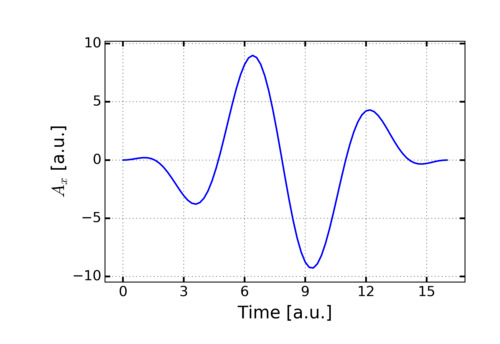" width="500" align="left"/>
</figure>

In this example, we are assuming $A_x(t)= A_y(t) = A_z(t)$, i.e., one laser pulse applied along the [111] direction.

For a detailed explanation of the element <code><span style="color:green">realTimeTDDFT</span></code>, please check the tutorial **Real-time TDDFT**. We go here through all attributes that appear in <code><span style="color:green">MD</span></code> to clarify their meaning:
- <code><span style="color:mediumblue">type</span></code>: Type of **MD** to be performed. In **Ehrenfest MD**, the outputs are printed out every **n** steps, where **n** is given by <code><span style="color:mediumblue">printAfterIterations</span></code>.
- <code><span style="color:mediumblue">printAllForces</span></code>: When set to <code><span style="color:firebrick">"true"</span></code>, the following components of the total force acting on an ion are printed out: **external**, **Hellmann-Feynman**, **core** and **valence** corrections..
- <code><span style="color:mediumblue">timeStep</span></code>: Time step $\Delta t_N$ of the **MD** calculation. When doing Ehrenfest **MD**, if $\Delta t_N$ is not a multiple of the time step $\Delta t_e$ used in the electronic evolution (**RT-TDDFT** evolution), it will be automatically rounded down to $n\Delta t_e$, where n is the largest integer lower or equal the ratio $\Delta t_N / \Delta t_e$.
- <code><span style="color:mediumblue">integrationAlgorithm</span></code>: Algorithm employed for the trajectory of the nuclei.

All relevant parameters for an "Ehrenfest Dynamics" calculation are found in **[Input Reference](https://www.exciting-code.org/home/about/input-reference)**.

<a id='3.1'></a>
**<span style="color:#15317E">i) Running exciting</span>**

Having modified the input file as described above, you can launch the **Ehrenfest Dynamics** calculation inside the subdirectory **ehrenfest** using

In [11]:
%%bash
cd run_BN_Ehrenfest
python3 -m excitingscripts.execute.single -r ehrenfest
cd ..

 ### Using specified input file: input.xml


   Elapsed time = 0m46s


Be aware that, depending on the computer you are using, this calculation may take several minutes.

**<span style="color:#15317E">ii) Output Files</span>**

Apart from the output files related to **RT-TDDFT** (explained in the tutorial **Real-time TDDFT**), an Ehrenfest Dynamics calculation also generates, for each atom, the output files:
- **ATOM_xyzw.OUT**: contains 10 columns, where
    - the first one has the time $t$;
    - columns 2-4 have the cartesian coordinates of the atom position $x(t)$, $y(t)$ and $z(t)$ (at the given time $t$);
    - columns 5-7 have the cartesian components of the atom velocity $v_x(t)$, $v_y(t)$ and $v_z(t)$;
    - columns 8-10 have the cartesian components of the total force acting on that atom $F_x(t)$, $F_y(t)$ and $F_z(t)$.
    
- **FEXT_xywz.OUT**, **FHF_xywz.OUT**, **FVAL_xywz.OUT** and **FCR_xywz.OUT**. These files are printed out only if <code><span style="color:mediumblue">printAllForces</span></code> is set to <code><span style="color:firebrick">"true"</span></code>. In each file, there are four columns, with the first one containing the time, and the other three, the cartesian components ($x$, $y$ and $z$) of the considered force:
    - **FEXT_xywz.OUT**: external force due to the applied electric field;
    - **FHF_xywz.OUT**: Hellman-Feynman force;
    - **FVAL_xywz.OUT**: valence corrections to the Hellman-Feynman force;
    - **FCR_xywz.OUT**: core corrections to the Hellman-Feynman force.

In the previous list of outputs, **x**, **y**, **z** and **w** are integer numbers **0-9** and the sequence **xyzw** refers to the number of a specific atom as given in **input.xml**. For instance **0001** refers to the 1st atom, **0002**, to the second, etc.

<a id='4'></a>
<hr style="border:1px solid #DDD"> </hr>

### <span style="color:#15317E">4. Visualizing the Outputs</span>

To visualize the $x$ component of the forces acting on boron (1st atom in **input.xml**), you can use the script **`excitingscripts.plot.multitask`** **[<span style="color:firebrick">[3]</span>](#6)** as follows:

In [1]:
%%bash
cd run_BN_Ehrenfest/ehrenfest
python3 -m excitingscripts.plot.multitask --ylabel '$F_x$ [a.u.]' --xlabel 'Time [a.u.]' -f ATOM_0001.OUT -k 0 7 -f FEXT_0001.OUT -k 0 1 -f FHF_0001.OUT -k 0 1 -f FVAL_0001.OUT -k 0 1 -f FCR_0001.OUT -k 0 1 -c 'Total' 'Ext' 'HF' 'Valence corr.' 'Core corr.' --xlim 0. 16. --legend_position 'upper left' --plot_name 'Force'
cd ../.. 

The resulting figure should look like

<figure>
<img src=" 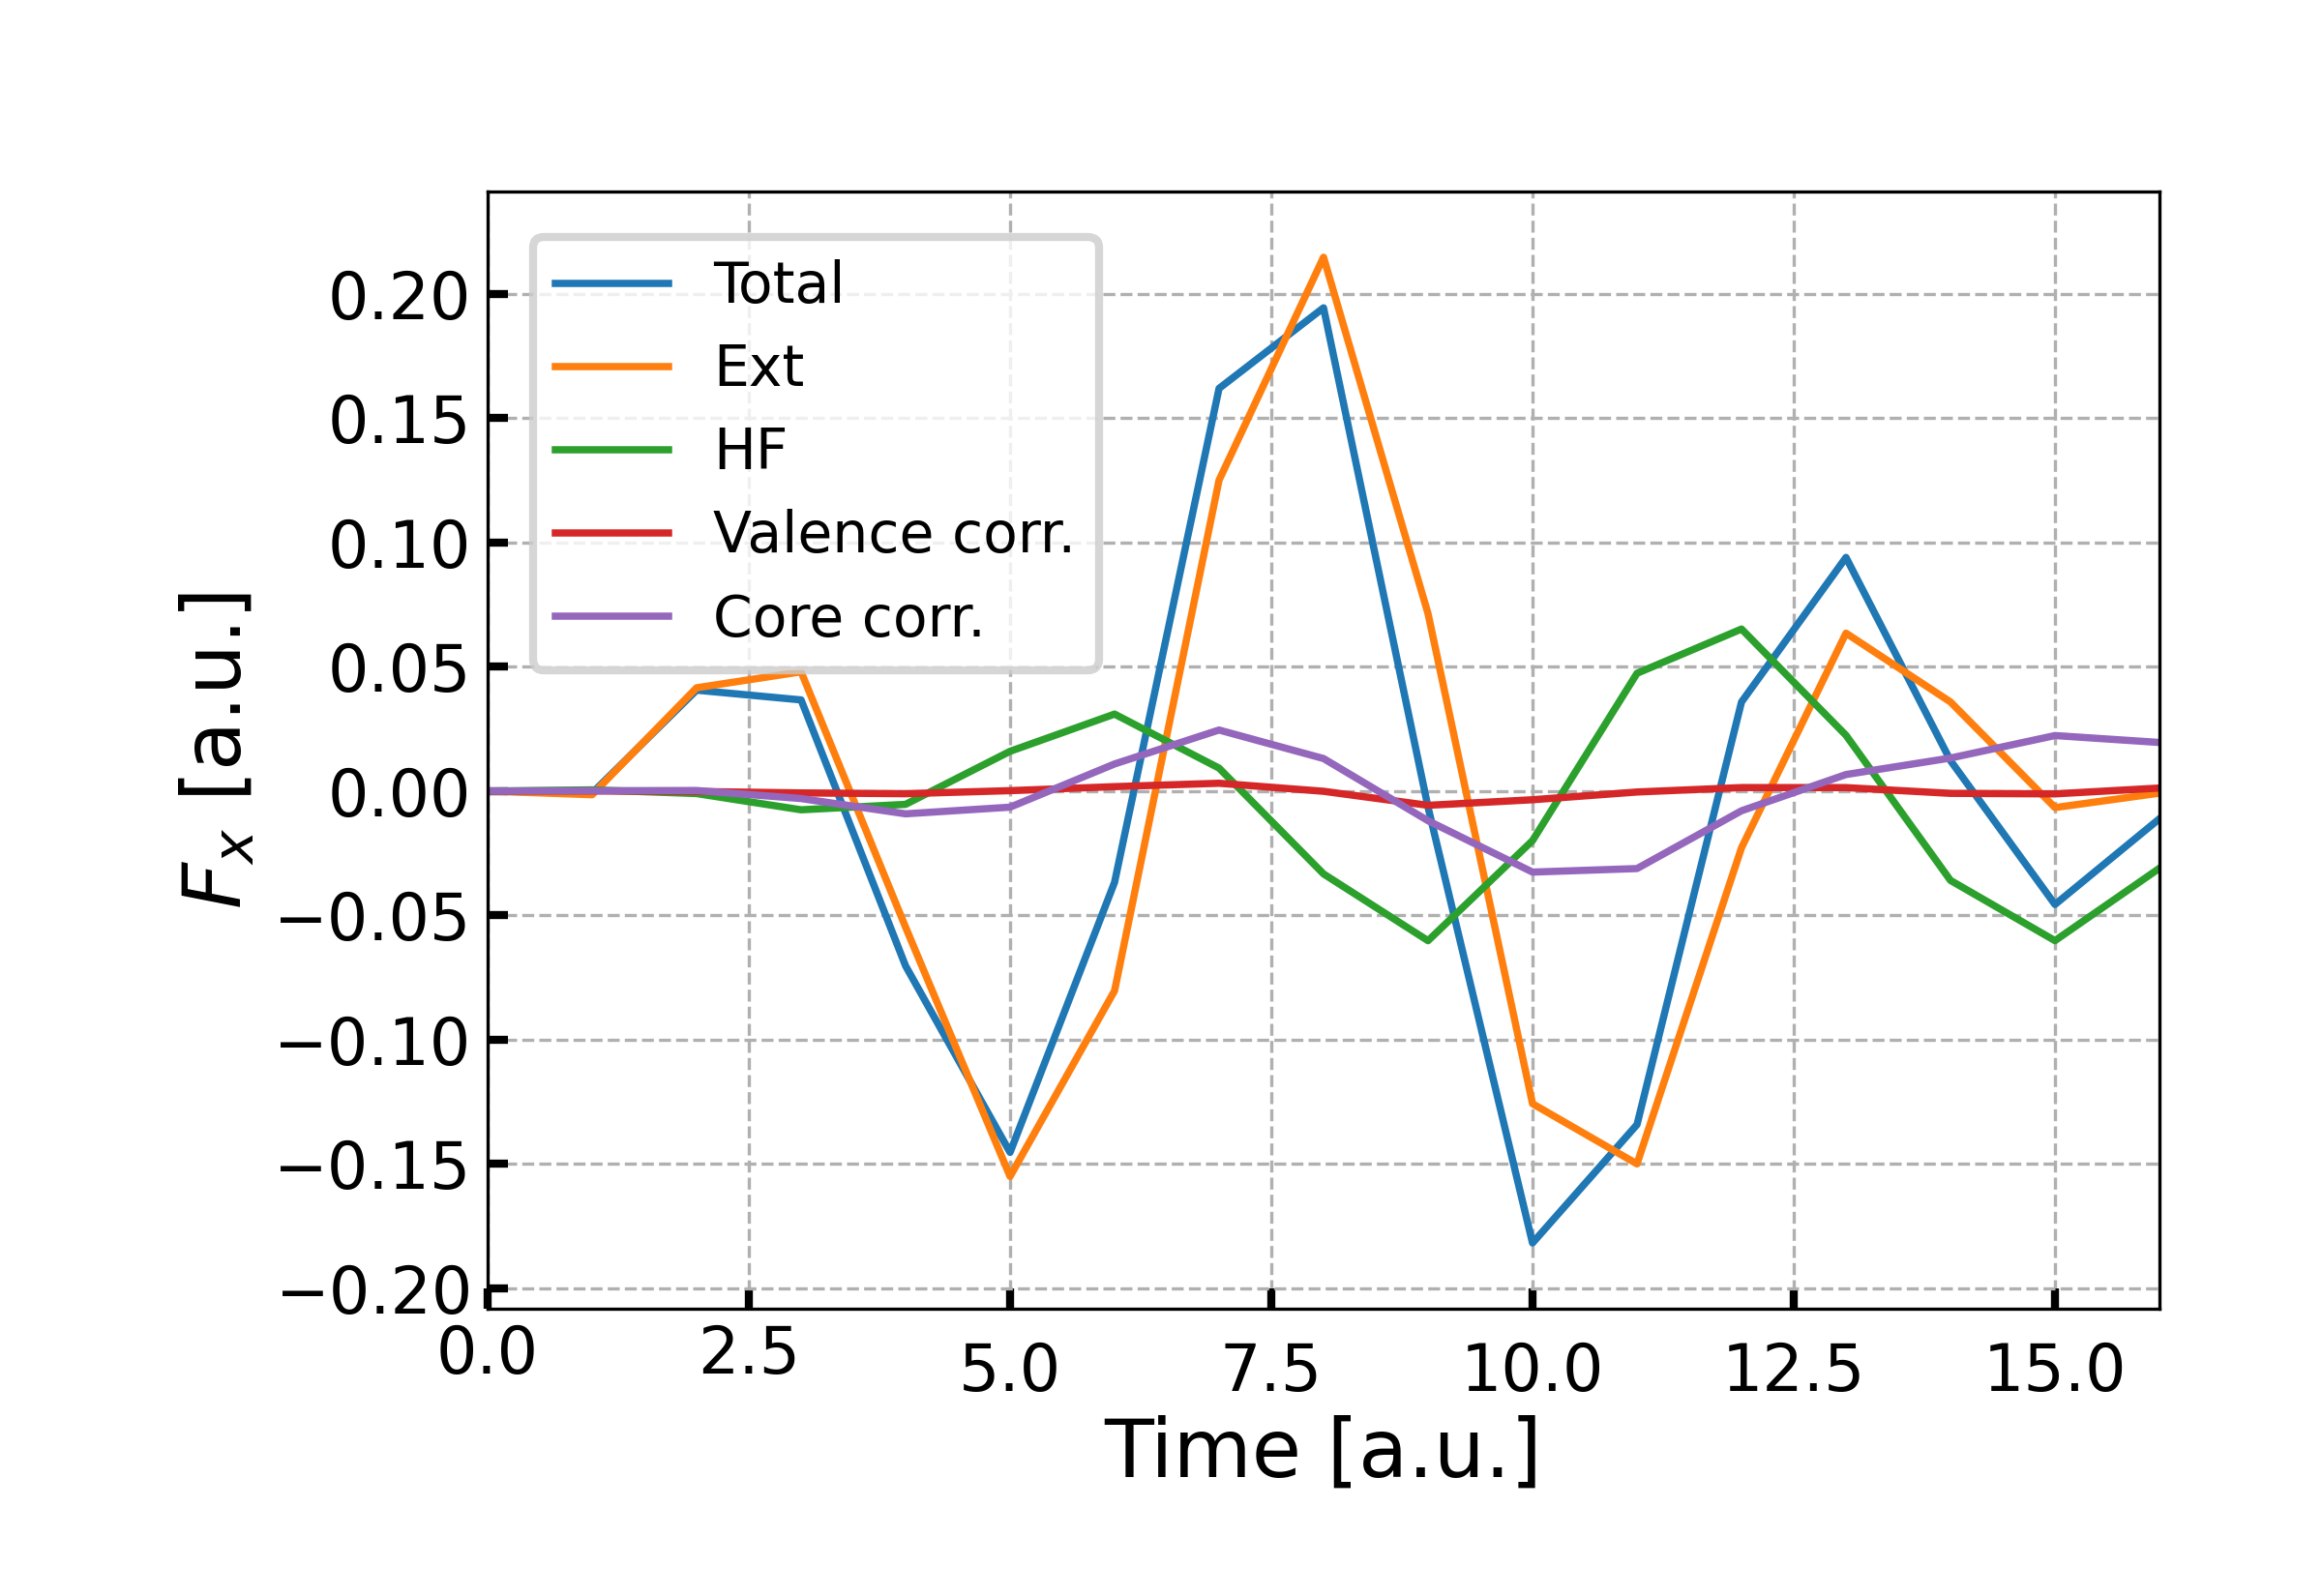" width="600" align="left"/>
</figure>

To check the time evolution of the position of boron, you can run the command:

In [2]:
%%bash
cd run_BN_Ehrenfest/ehrenfest
python3 -m excitingscripts.plot.multitask --ylabel 'Position [bohr]' --xlabel 'Time [a.u.]' -f ATOM_0001.OUT -k 0 1 -f ATOM_0001.OUT -k 0 2 -f ATOM_0001.OUT -k 0 3 -c '$x(t)$' '$y(t)$' '$z(t)$' --xlim 0. 16. --legend_position 'upper left' --plot_name 'Position'
cd ../.. 

to obtain a figure like

<figure>
<img src=" 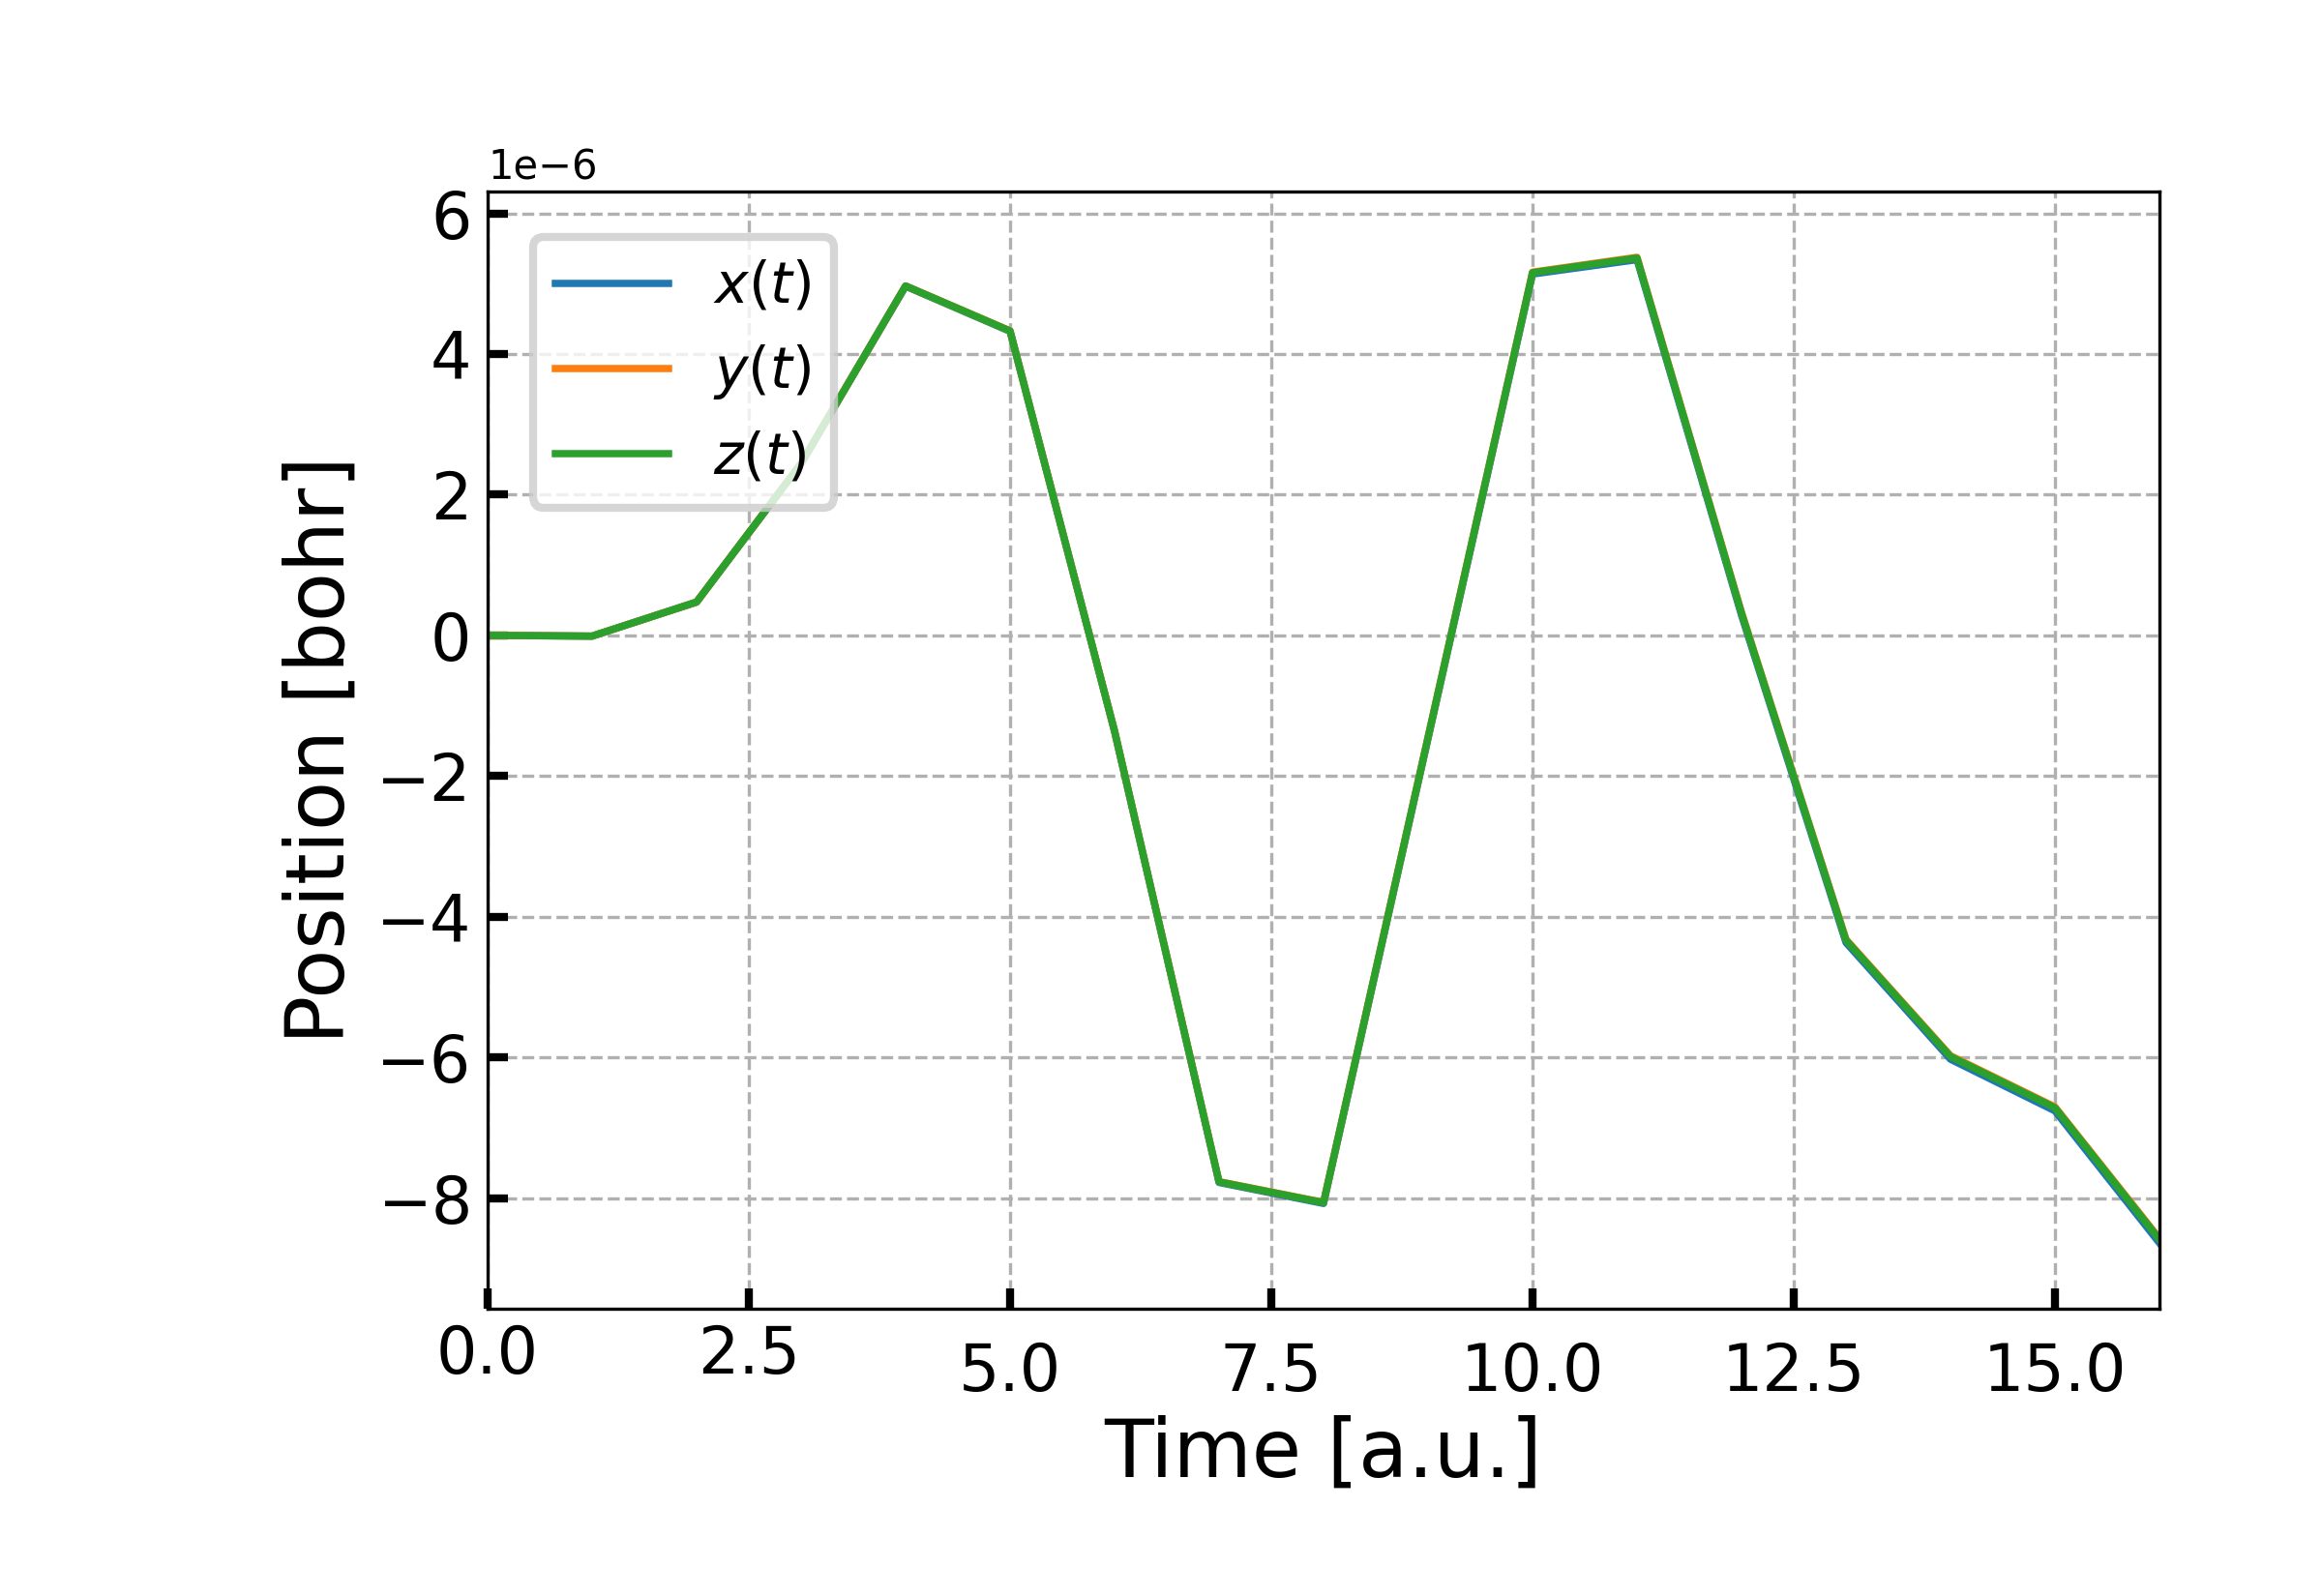" width="600" align="left"/>
</figure>

<a id='5'></a>
<hr style="border:1px solid #DDD"> </hr>

### <span style="color:#15317E">5. Converging the Results</span>

From the previous two figures, you can conclude that the test case analyzed here should be considered as a pedagogical example. Following remarks can be done

- The time step $\Delta t_N$ in the <code><span style="color:green">MD</span></code> element needs to be smaller, to obtain a more smooth curve of the forces or the positions over time $t$. There is an optimal ratio between $\Delta t_N/\Delta t_e$ that allows for a good compromise between the computational time and accuracy (see discussion in **[<span style="color:firebrick">Ref. [1]</span>](#6)**).
- <code><span style="color:mediumblue">endTime</span></code> is quite small in the example. For reallistic **MD** calculations, this should be on the order of fs or ps (1 fs = 41.34 a.u. and 1 ps = 41341 a.u.).
- The frequency and the duration of the laser pulse here are not intended to reproduce experimental settings. Typically, the laser pulse could last for some fs. Moreover, a laser frequency closer to the phonon frequencies would lead to more pronounced atom movements.
- For better converged calculations, the following parameters should be carefully checked:
     - <code><span style="color:mediumblue">ngridk</span></code>
     - <code><span style="color:mediumblue">rgkmax</span></code>
     - local-orbitals

<a id='6'></a>
<hr style="border:1px solid #DDD"> </hr>

### <span style="color:#15317E">Bibliography</span>

1.  Ronaldo Rodrigues Pela and Claudia Draxl. "Ehrenfest dynamics implemented in the all-electron package **exciting**" (**[link](https://iopscience.iop.org/article/10.1088/2516-1075/ac7afc)**).
2. Ronaldo Rodrigues Pela, Claudia Draxl. "All-electron full-potential implementation of real-time **TDDFT** in **exciting**" (**[link](https://iopscience.iop.org/article/10.1088/2516-1075/ac0c26)**).
3. More information about the script **`excitingscripts.plot.multitask`** can be found **[here](https://www.exciting-code.org/home/the-python-script-plot.multitask)**.

<hr style="border:2px solid #DDD"> </hr>